# 透過 Keras 實做服裝分類

## 目錄

- 前期準備
- 使用 Keras 建構分類模型
- 訓練模型

## 前期準備

### 匯入套件

In [1]:
# 匯入 Tensorflow 與 tf.keras
import tensorflow as tf

# 匯入 Numpy 與 Matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2023-10-23 22:13:14.255431: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 22:13:14.281780: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-23 22:13:14.281803: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-23 22:13:14.281828: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-23 22:13:14.286705: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 22:13:14.287020: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

### 匯入 Fashion MNIST 資料集

In [2]:
# 從 Keras Datasets 中匯入服裝資料集
fashion_mnist = tf.keras.datasets.fashion_mnist

# 從資料集中提取資料，分為訓練集與驗證集
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### 定義服裝類別

In [3]:
# 定義服裝類別
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 縣市服裝類別表
pd.DataFrame(class_names, columns=["class"])

,class
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


#### 顯示資料集

##### 訓練集形狀

In [4]:
# 印出訓練集的形狀
train_images.shape

(60000, 28, 28)

##### 訓練集影像數量

In [5]:
# 印出訓練集的數量
len(train_images)

60000

##### 測試集標籤

In [6]:
# 印出訓練集的標籤
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

##### 測試集形狀

In [7]:
# 印出測試集的形狀
test_images.shape

(10000, 28, 28)

##### 測試集影像數量

In [8]:
# 印出測試集標籤的數量
len(test_labels)

10000

### 資料預處理

#### 顯示一筆影像

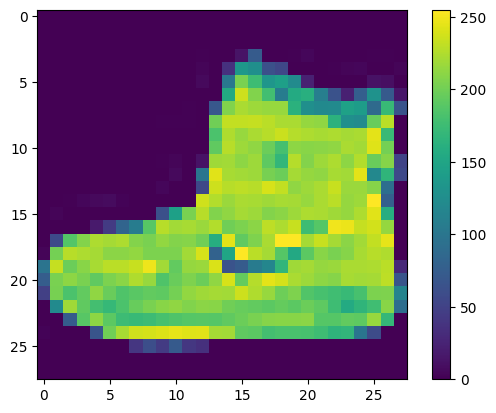

In [9]:
# 顯示一張影像
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#### 資料正規化

In [10]:
# 對訓練集與測試集的影像進行正規化
train_images = train_images / 255.0
test_images = test_images / 255.0

##### 顯示一筆正規後的影像

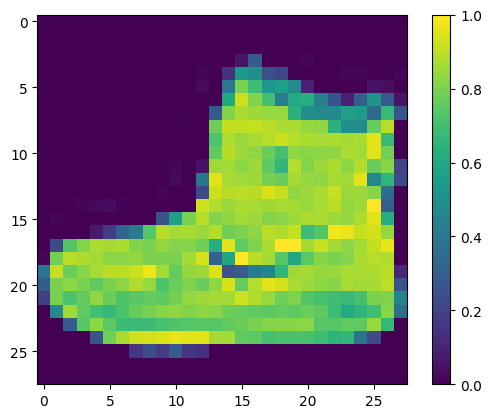

In [11]:
# 顯示一張正規化後的影像
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#### 顯示資料集中的影像

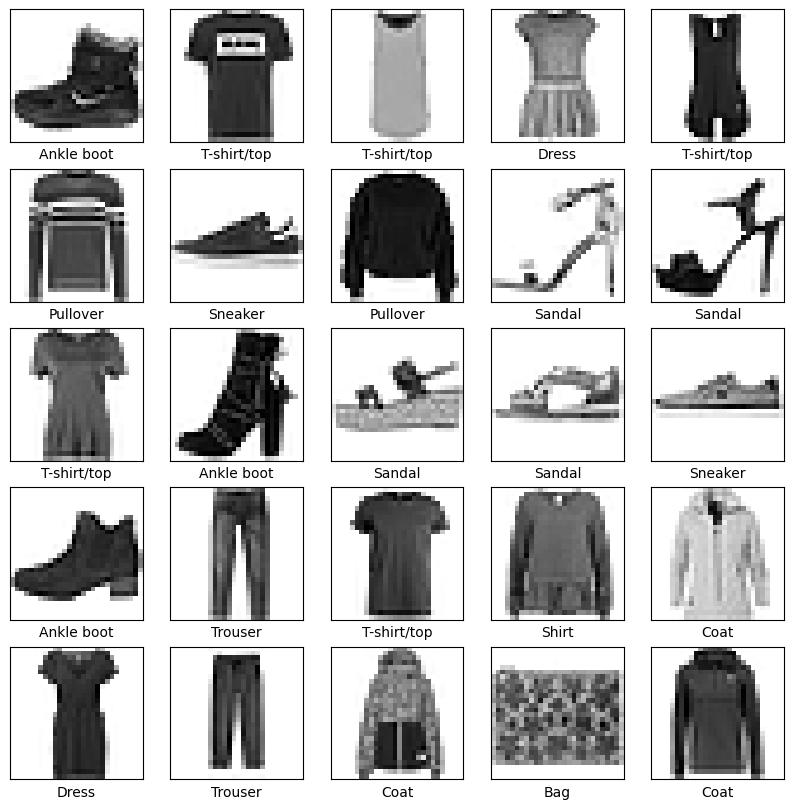

In [12]:
# 在 10x10 的畫布中顯示影像
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap='binary')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

## 使用 Keras 建構分類模型

### 設置模型的每一層

In [13]:
# 使用 Keras 建置序列模型
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10)
])

2023-10-23 22:13:16.927352: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-23 22:13:16.927540: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-23 22:13:16.927867: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the 

### 編譯模型

In [14]:
# 對模型進行編譯
model.compile(
    # optimizer=tf.keras.optimizers.Adam,
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # metrics=[tf.keras.metrics.Accuracy]
    metrics=['accuracy'],
)

## 訓練模型

### 模型擬合

In [15]:
# 對模型進行訓練
model.fit(
    train_images,
    train_labels,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4933 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3725 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3350 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3141 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2945 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2812 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2687 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2575 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2490 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.240

### 評估正確率

In [16]:
# 使用測試集，評估模型的正確率
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\n測試集正確率:", test_acc)

313/313 - 0s - loss: 0.3516 - accuracy: 0.8806 - 296ms/epoch - 946us/step

測試集正確率: 0.8805999755859375


### 模型預測

#### 建立機率模型

In [17]:
# 建立機率模型
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

#### 預測類別機率

In [18]:
# 使用機率模型進行預測
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 628us/step


#### 顯示一筆的各類別預測機率

In [19]:
# 顯示一筆資料的預測機率
predictions[0]

array([3.2865522e-08, 1.8752222e-07, 1.7419850e-09, 7.3439345e-11,
       2.8649458e-09, 6.4081856e-04, 8.4738900e-09, 3.5966742e-03,
       2.0895060e-08, 9.9576223e-01], dtype=float32)

#### 獲取預測類別

In [20]:
# 提出最有可能的結果
np.argmax(predictions[0])

9

#### 查看標準答案

In [21]:
# 顯示標準答案進行比較
test_labels[0]

9

### 驗證預測

#### 撰寫繪製圖片的副程式

In [22]:
# 繪製影像
def plot_image(idx, predictions_array, true_label, img):
    true_label, img = true_label[idx], img[idx]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap='binary')

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label]
        ),
        color=color
    )

#### 撰寫繪製預測值的副程式

In [23]:
# 繪製預測圖表
def plot_value_array(idx, predictions_array, true_label):
    true_label = true_label[idx]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    current_plot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    current_plot[predicted_label].set_color('red')
    current_plot[true_label].set_color('blue')

#### 查看一筆預測正確的資料

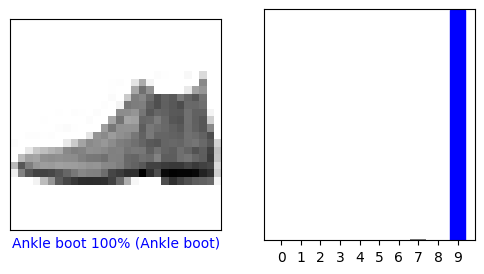

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

#### 查看一筆預測錯誤的資料

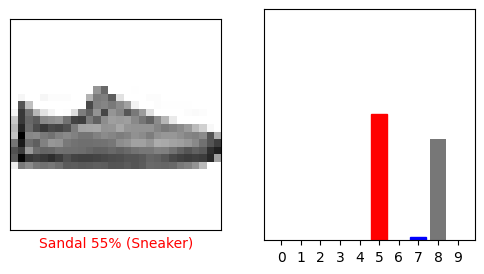

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

#### 顯示多筆預測資料

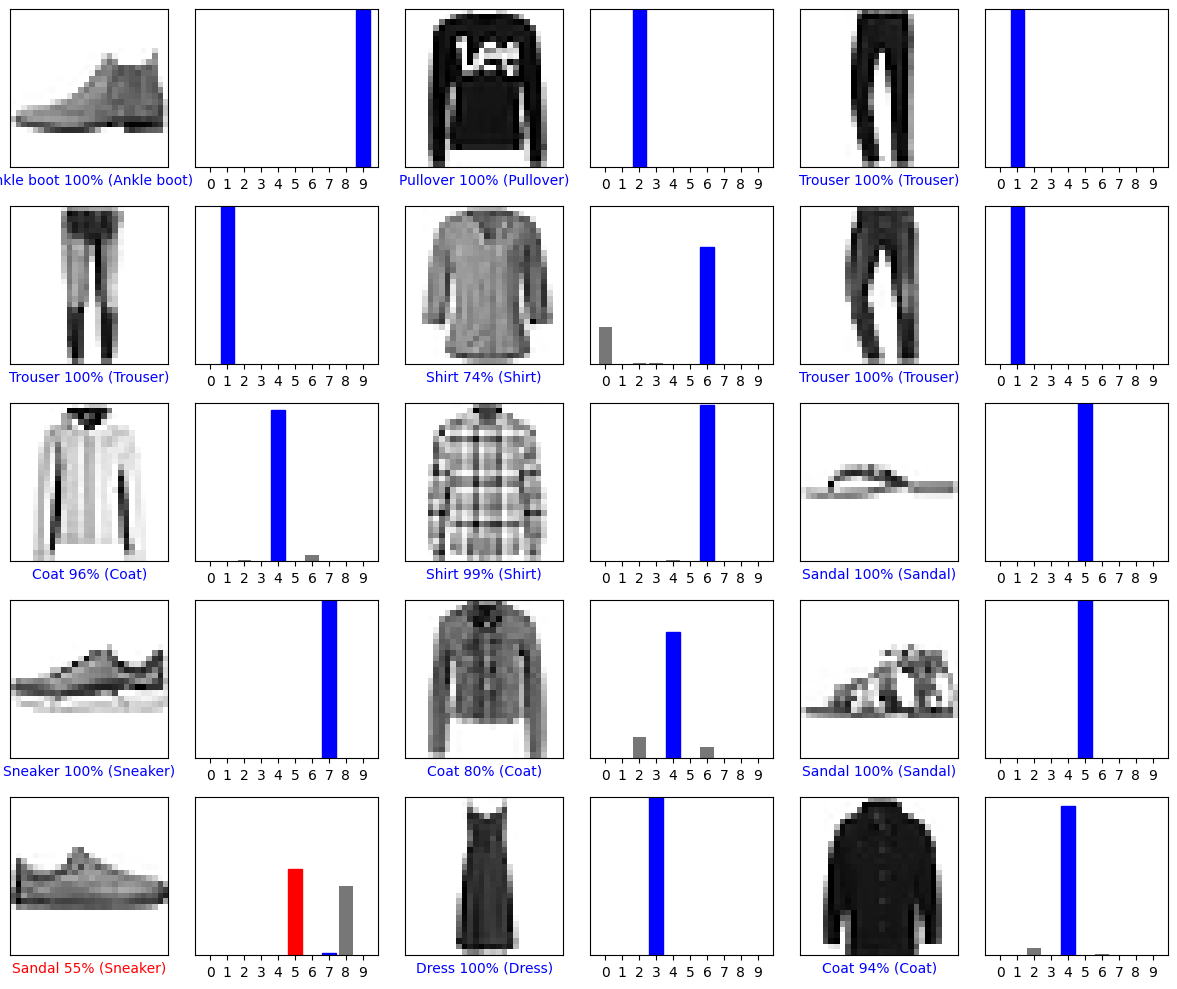

In [26]:
# 定義行與列
num_rows = 5
num_cols = 3

# 計算影像數量
num_images = num_rows * num_cols

# 建立圖表
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

# 繪製影像
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)

# 顯示圖表
plt.tight_layout()
plt.show()

## 使用訓練模型

### 拿取一張影像

In [27]:
img = test_images[1]

print(img.shape)

(28, 28)


### 進行 Batch 前處理

In [28]:
batch_img = (np.expand_dims(img, 0))

print(batch_img.shape)

(1, 28, 28)


### 對影像進行預測

In [29]:
prediction = probability_model.predict(batch_img)

print(prediction)

1/1 [==============================] - 0s 10ms/step
[[1.5564766e-04 5.7849355e-14 9.9910021e-01 2.7529157e-12 5.6194584e-04
  2.1149785e-11 1.8219979e-04 1.9160671e-18 1.6466671e-10 6.0729563e-13]]


### 得到預測類別

In [30]:
np.argmax(prediction[0])

2

### 繪製成圖表

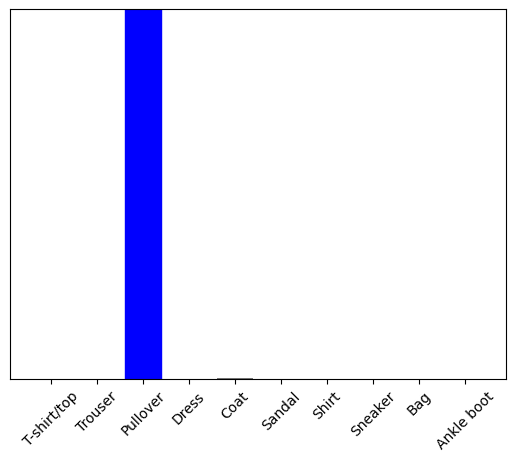

In [31]:
plot_value_array(1, prediction[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()